আজ আমরা ডীপ লার্নিংয়ের Hello world অর্থাৎ একদম বেসিক একটা ডেটাসেট নিয়ে কাজ করব। একে Fashion mnist dataset  বলে। 
শুরুতে আমরা দরকারি লাইব্রেরিগুলো ইম্পোর্ট করে নিই। 

In [1]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#সিস্টেমের স্ট্যাটাস দেখি 
print("version:", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABE")

version: 2.2.0
Eager mode:  True
GPU is NOT AVAILABE


In [2]:
# কেরাস দিয়ে ডেটাসেট এক্সেস
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Exploratory Data analysis

In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## ট্রেনিং য়ের ছবি এবং তার লেভেল  

In [11]:
print('Image label: ', train_labels[0])
print('Image: ')
print(train_images[0])

Image label:  9
Image: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   

image label:  9


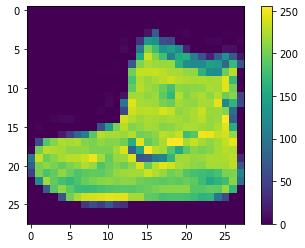

In [15]:
i = 0;
print("image label: ", train_labels[i])
plt.imshow(train_images[i])
plt.colorbar()

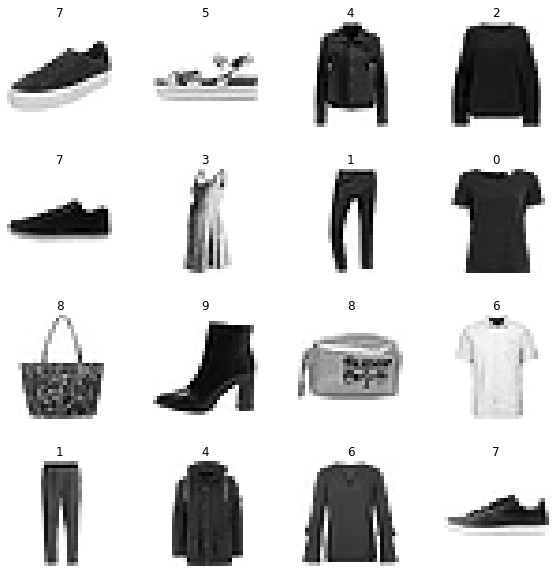

In [57]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10, 10))
axes = axes.ravel()

n_training = len(train_images)

for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(train_images[index], cmap=plt.cm.binary)
    axes[i].set_title(train_labels[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

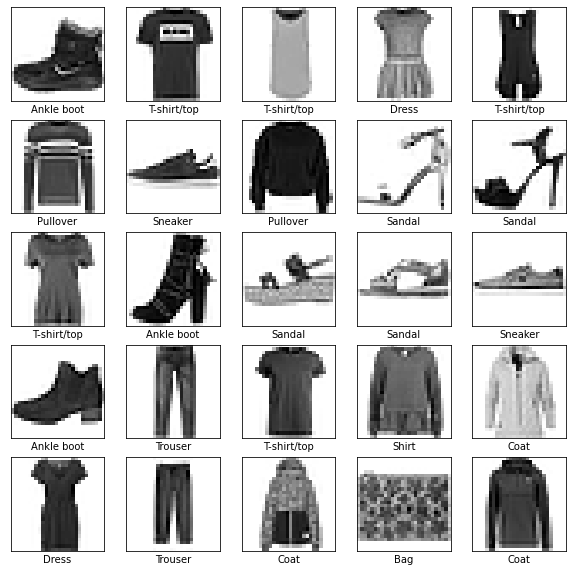

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Data Preprocess

In [3]:
train_images = train_images/255.0
test_images = test_images/255.0

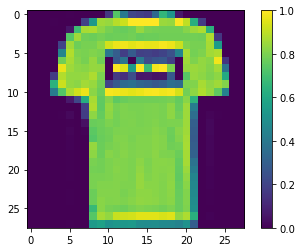

In [21]:
plt.imshow(train_images[1])
plt.colorbar()

# Build an ANN model

In [5]:
model = tf.keras.models.Sequential()

          


In [9]:
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))


In [10]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5019 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3787 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3370 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3131 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2950 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2824 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2688 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2568 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2488 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 992us/step - loss: 0.3644 - accuracy: 0.8779


In [14]:
print(test_acc)

0.8779000043869019


In [15]:
prediction = model.predict(test_images)

In [23]:
print("Actual result:", test_labels[0])
print("Predicte result:", np.argmax(prediction[0]))

Actual result: 9
Predicte result: 9


# Call Back


In [6]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True


In [7]:
import tensorflow as tf

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallBack()          

In [8]:


fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [9]:
train_images, test_images = train_images/255.0, test_images/255.0

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [11]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4994 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3727 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3373 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3122 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2980 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2819 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2701 - accuracy: 0.9002
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.9002


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [15]:
layers = model.layers

In [16]:
print(layers)

[<tensorflow.python.keras.layers.core.Flatten object at 0x7f908c4f4050>, <tensorflow.python.keras.layers.core.Dense object at 0x7f908c4f4090>, <tensorflow.python.keras.layers.core.Dense object at 0x7f908f12b0d0>]


In [17]:
hidden1 = layers[1]

In [18]:
print(hidden1.name)

dense


In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights.shape

(784, 128)

In [26]:
biases.shape

(128,)

In [19]:
print(weights[0].shape)

(128,)


In [20]:
output_layer = layers[2]

In [21]:
weights, biases = output_layer.get_weights()

In [22]:
weights.shape

(128, 10)

# মডেলের টেন্সর-ফ্লো লাইট ভার্সন

In [19]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


# মডেলকে কনভার্ট করি

In [20]:
# Conver the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [27]:
print(type(tflite_model))

<class 'bytes'>


In [21]:
tflite_model_file = 'model.tflite'

with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

In [ ]:
with open('labels.txt', 'w') as f:
  f.write('\n'.join(class_names))

In [24]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

SyntaxError: invalid syntax (<ipython-input-25-e42140c65a33>, line 1)